<div style='float: right'><img src='pic/starbattle.png'/></div>

## <div id='building' />スターバトル

In [1]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import pandas as pd, matplotlib.pyplot as plt
from pulp import LpProblem, lpSum, value
from ortoolpy import addbinvars
data = """\
AABBB
AABCC
ADDDC
DDECC
EEEEC""".splitlines()

### 問題
* 各行、各列、各エリアに★をちょうど1つ置く。
* ★の周り(8か所)に★は置けない

### 変数
* v：★があるか (1)

### 制約
* 各行(2)、各列(3)、各エリア(4)に1つ
* 2x2に1以下 (5)

In [2]:
nn = len(data)
a = pd.DataFrame([(i,j,data[i][j]) for i in range(nn)
    for j in range(nn)], columns=list('行列字'))
a['Var'] = addbinvars(len(a))
a[:2]

,行,列,字,Var
0,0,0,A,v000001
1,0,1,A,v000002


In [3]:
m = LpProblem()
for cl in ['行','列','字']:
    for _,v in a.groupby(cl):
        m += lpSum(v.Var) == 1
for i in range(nn-1):
    for j in range(nn-1):
        q = f'{i}<=行<={i+1}&{j}<=列<={j+1}'
        m += lpSum(a.query(q).Var) <= 1
m.solve()

1

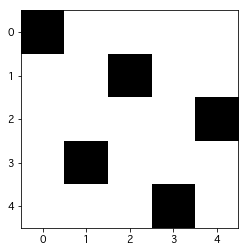

In [4]:
a['Val'] = a.Var.apply(value)
plt.imshow((a.Val<0.5).values.reshape(nn,nn), cmap='gray', interpolation='none');